In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings('ignore')

#### Read train & test datasets

In [ ]:
train_dataset = pd.read_csv("/content/drive/MyDrive/Used Car Prices Dataset/train.csv", index_col='id')
test_dataset = pd.read_csv("/content/drive/MyDrive/Used Car Prices Dataset/test.csv", index_col='id')

# Exploratory Data Analysis (EDA)

#### Step-1: Data Understanding


*   DataFrame shape
*   Head and Tail


*   dtypes
*   describe



In [ ]:
train_dataset.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [ ]:
train_dataset.shape

(188533, 12)

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 18.7+ MB


In [ ]:
train_dataset.describe()

,model_year,milage,price
count,188533.000000,188533.000000,1.885330e+05
mean,2015.829998,65705.295174,4.387802e+04
std,5.660967,49798.158076,7.881952e+04
min,1974.000000,100.000000,2.000000e+03
25%,2013.000000,24115.000000,1.700000e+04
50%,2017.000000,57785.000000,3.082500e+04
75%,2020.000000,95400.000000,4.990000e+04
max,2024.000000,405000.000000,2.954083e+06


### Step-2: Data Preparation


*   Check missing values
*   Check duplicates









In [ ]:
train_dataset.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0
accident,2452


##### There are missing values in the following columns [fuel_type, accident, clean_title]

In [ ]:
train_dataset.duplicated().sum()

0

In [ ]:
test_dataset.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0
accident,1632


##### There are missing values in the following columns in test dataset [fuel_type, accident, clean_title]

In [ ]:
test_dataset.duplicated().sum()

0

In [ ]:
train_dataset['price'].max()

2954083

In [ ]:
train_dataset[train_dataset['price'] == train_dataset['price'].max()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083
1880,Chrysler,300C Base,2003,55900,Gasoline,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Beige,Beige,None reported,Yes,2954083
13838,Toyota,Highlander SE,2014,85000,Gasoline,3.5L V6 24V PDI DOHC,8-Speed Automatic,Green,Black,None reported,Yes,2954083
14693,Hyundai,Santa Fe SEL,2022,13865,Gasoline,2.5L I4 16V PDI DOHC,8-Speed Automatic,Black,Black,None reported,Yes,2954083
16034,Mercedes-Benz,SL-Class SL500 Roadster,2005,34068,Gasoline,302.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Beige,None reported,Yes,2954083
18946,Audi,S4 Base,2004,73500,Gasoline,340.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Beige,None reported,Yes,2954083
21814,RAM,1500 Laramie,2022,16156,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,2954083
36615,Ford,Excursion Limited Ultimate,2002,89900,Diesel,325.0HP 6.0L 8 Cylinder Engine Diesel Fuel,5-Speed A/T,Gold,Gold,None reported,Yes,2954083
42177,Ford,Mustang GT,2005,82000,Gasoline,300.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,5-Speed M/T,Silver,Black,None reported,Yes,2954083


In [ ]:
train_dataset['price'].min()

2000

In [ ]:
train_dataset[train_dataset['price'] == train_dataset['price'].min()]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
758,Pontiac,Firebird Trans Am,2001,150000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Beige,None reported,Yes,2000
3681,Toyota,Camry Hybrid Base,2003,155000,Hybrid,147.0HP 2.4L 4 Cylinder Engine Gas/Electric Hy...,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,2000
4781,Toyota,Camry Solara SLE,2001,73690,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Gray,None reported,Yes,2000
11146,Chevrolet,Monte Carlo SS,2001,64776,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,4-Speed A/T,Gray,Black,None reported,Yes,2000
12655,Mercedes-Benz,SLK-Class SLK320,2003,107000,Gasoline,215.0HP 3.2L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Black,Black,None reported,Yes,2000
17482,GMC,Terrain SLT-1,2003,90000,Gasoline,181.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,5-Speed A/T,Blue,Beige,None reported,Yes,2000
17849,Acura,MDX Touring,2007,116000,Gasoline,260.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,2000
18918,Ford,Dakota SLT Quad Cab,2002,138000,Gasoline,220.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,A/T,Blue,Gray,None reported,Yes,2000
19305,Mitsubishi,Eclipse Spyder GT,2003,120000,Gasoline,260.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,2000


In [ ]:
train_dataset['price'].mean()

43878.01617753921

In [ ]:
%matplotlib inline

In [ ]:
highest_price = train_dataset[train_dataset['price'] == train_dataset['price'].max()]

<Axes: xlabel='id'>

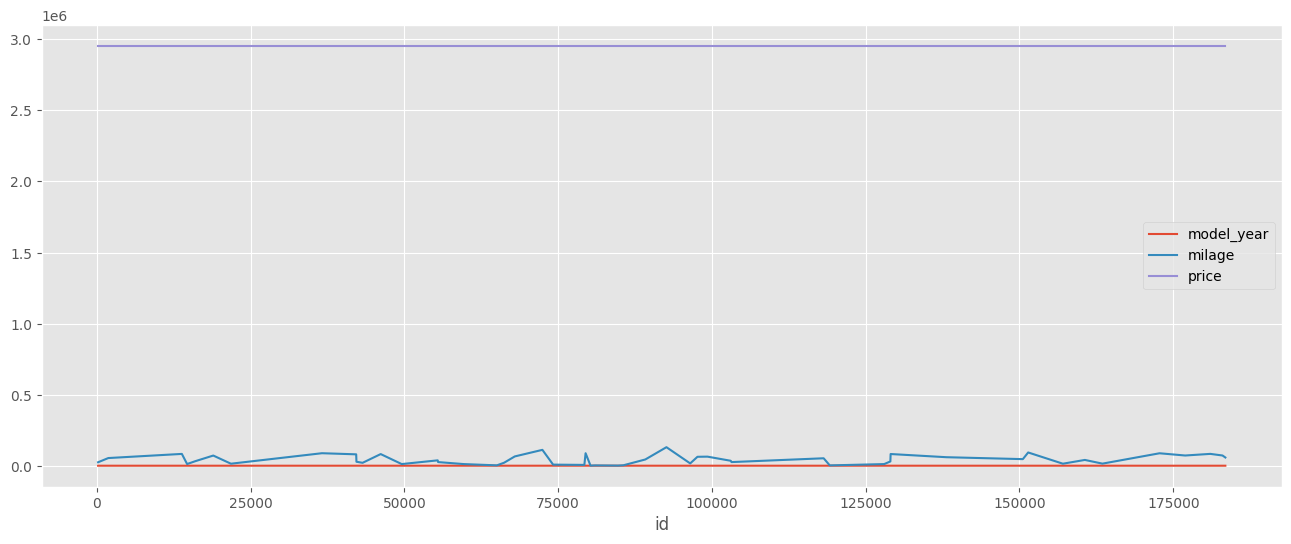

In [ ]:
highest_price.plot(figsize=(16, 6))

### Step-3: Feature Understanding

### Plotting feature distribution
*   Histogram
*   KDE


*   BoxPlot





In [ ]:
train_dataset.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

<Axes: xlabel='id'>

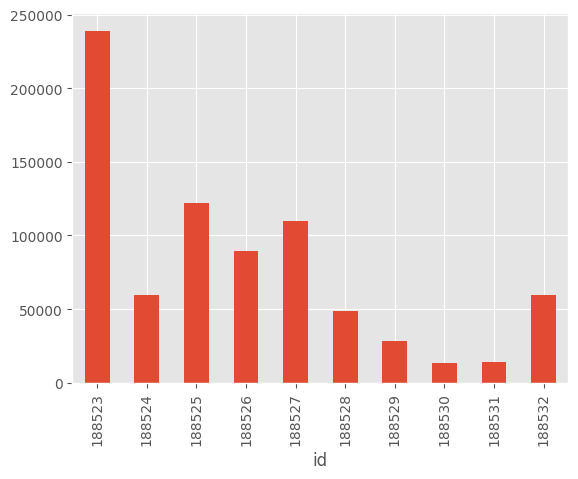

In [ ]:
train_dataset['milage'].tail(10).plot(kind='bar')

<Axes: xlabel='id'>

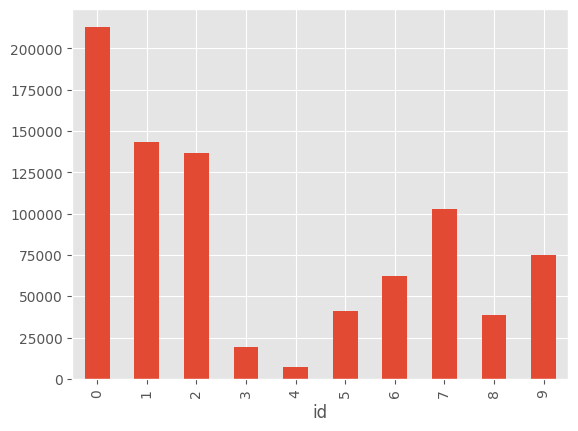

In [ ]:
train_dataset['milage'].head(10).plot(kind='bar')

<Axes: xlabel='id'>

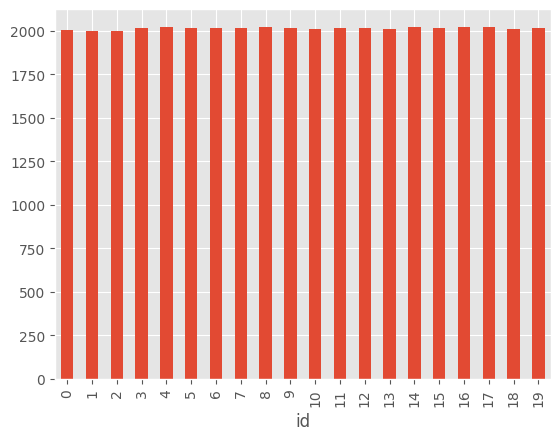

In [ ]:
train_dataset['model_year'].head(20).plot(kind='bar')

<Axes: xlabel='id'>

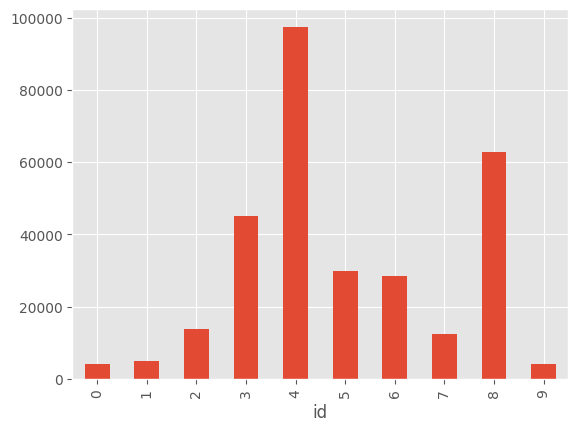

In [ ]:
train_dataset['price'].head(10).plot(kind='bar')

<Axes: ylabel='Frequency'>

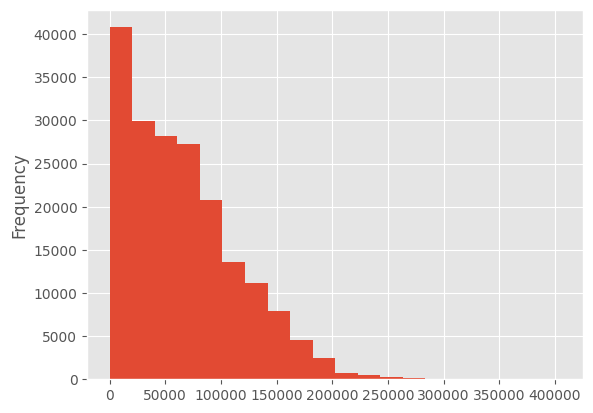

In [ ]:
train_dataset['milage'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

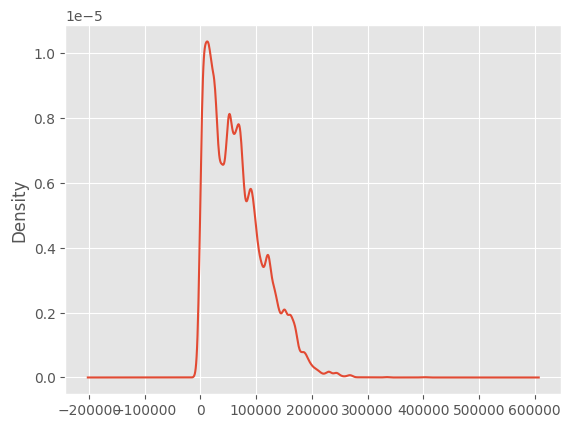

In [ ]:
train_dataset['milage'].plot(kind='kde')

In [ ]:
import seaborn as sns

In [ ]:
train_dataset.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

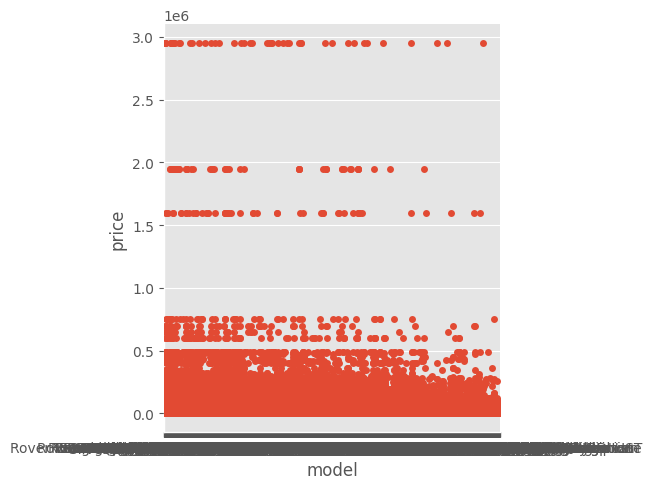

In [ ]:
sns.catplot(data=train_dataset, x="model", y="price")

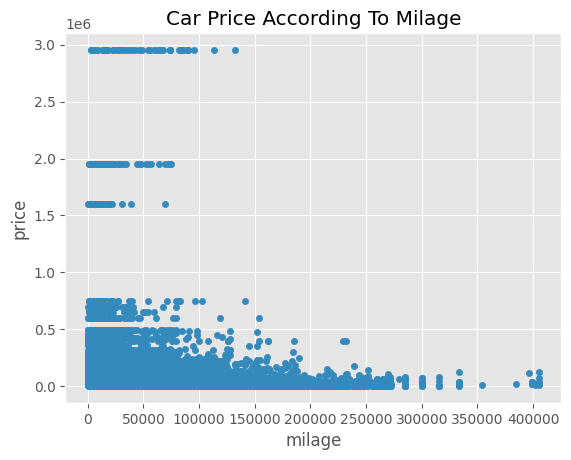

In [ ]:
train_dataset.plot(kind='scatter', x='milage',
             y='price', title = 'Car Price According To Milage')
plt.show()

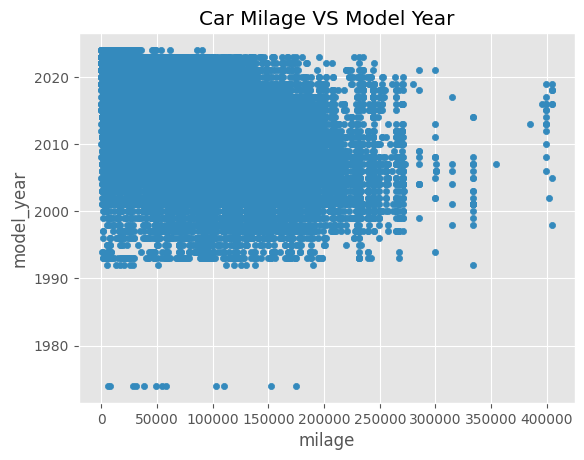

In [ ]:
train_dataset.plot(kind='scatter', x='milage',
             y='model_year', title = 'Car Milage VS Model Year')
plt.show()

In [ ]:
train_dataset.select_dtypes(include=['float64', 'int64']).columns

Index(['model_year', 'milage', 'price'], dtype='object')

In [ ]:
dataset_corr = train_dataset[['model_year', 'milage']].corr()

In [ ]:
dataset_corr

,model_year,milage
model_year,1.000000,-0.669936
milage,-0.669936,1.000000


<Axes: >

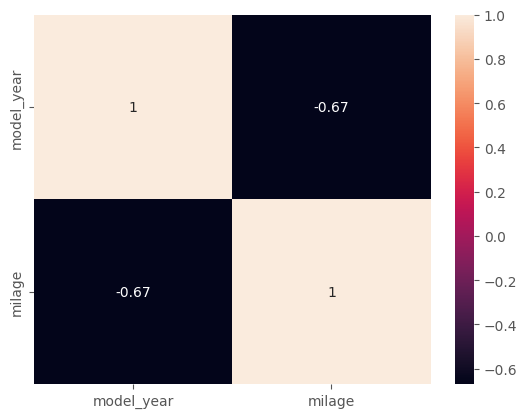

In [ ]:
sns.heatmap(dataset_corr, annot=True)

#### Check Outliers

array([[<Axes: title={'center': 'model_year'}>,
        <Axes: title={'center': 'milage'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

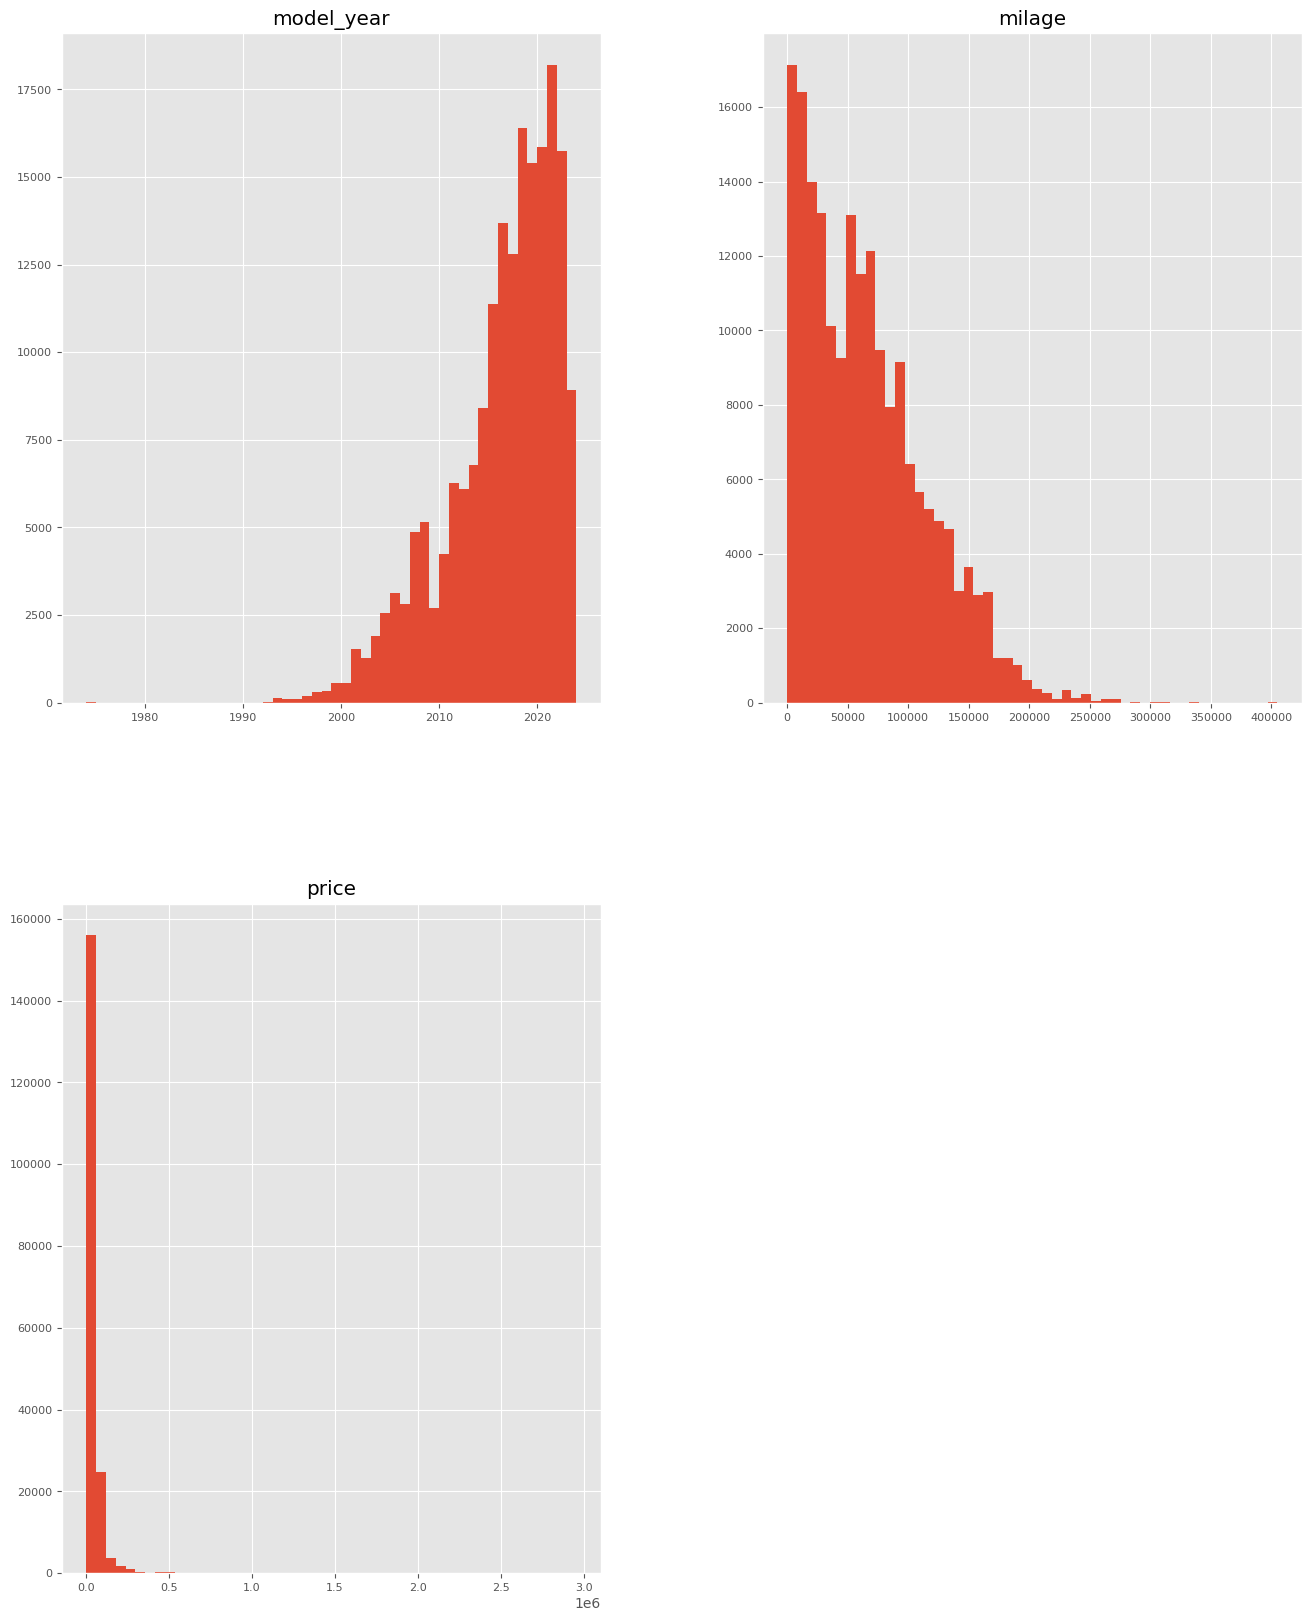

In [ ]:
train_dataset.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
temp = train_dataset[train_dataset['model_year'] < 1980]

<Axes: xlabel='model_year', ylabel='price'>

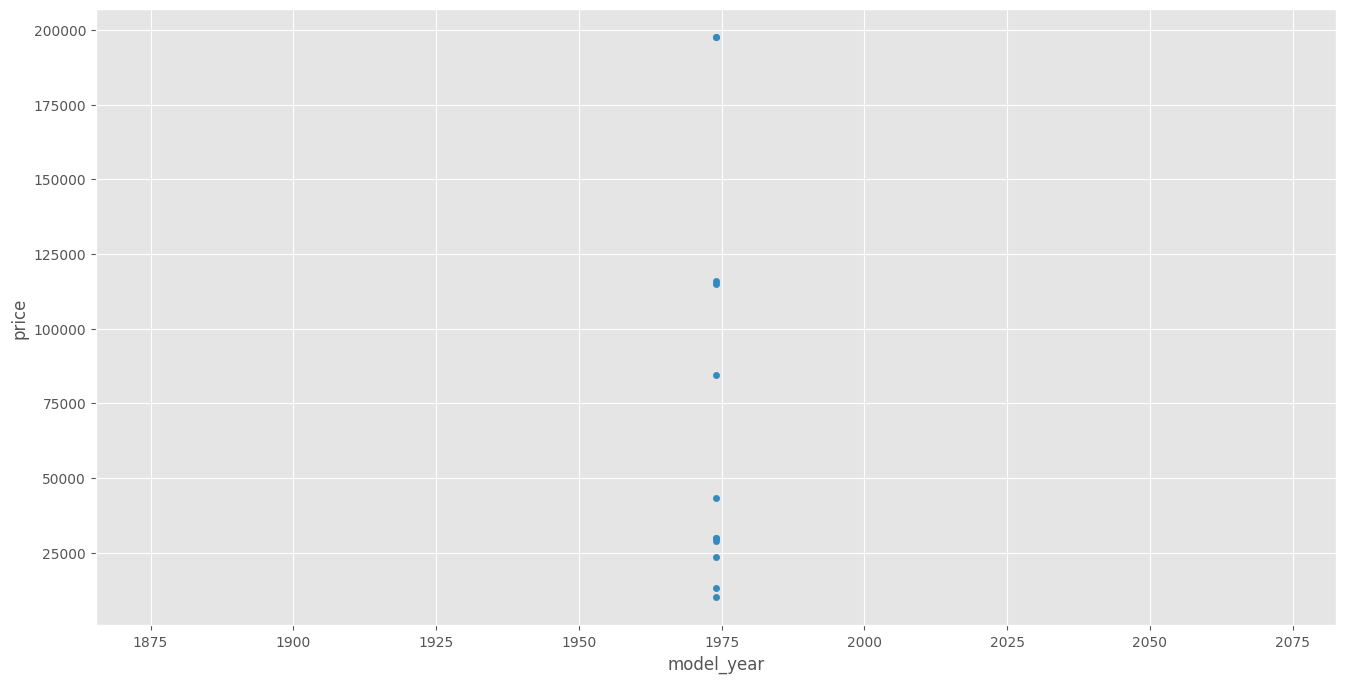

In [ ]:
temp[['price', 'model_year']].plot(kind='scatter', x='model_year', y='price', figsize=(16, 8))

In [ ]:
temp = train_dataset[train_dataset['milage'] > 250000]

<Axes: xlabel='milage', ylabel='price'>

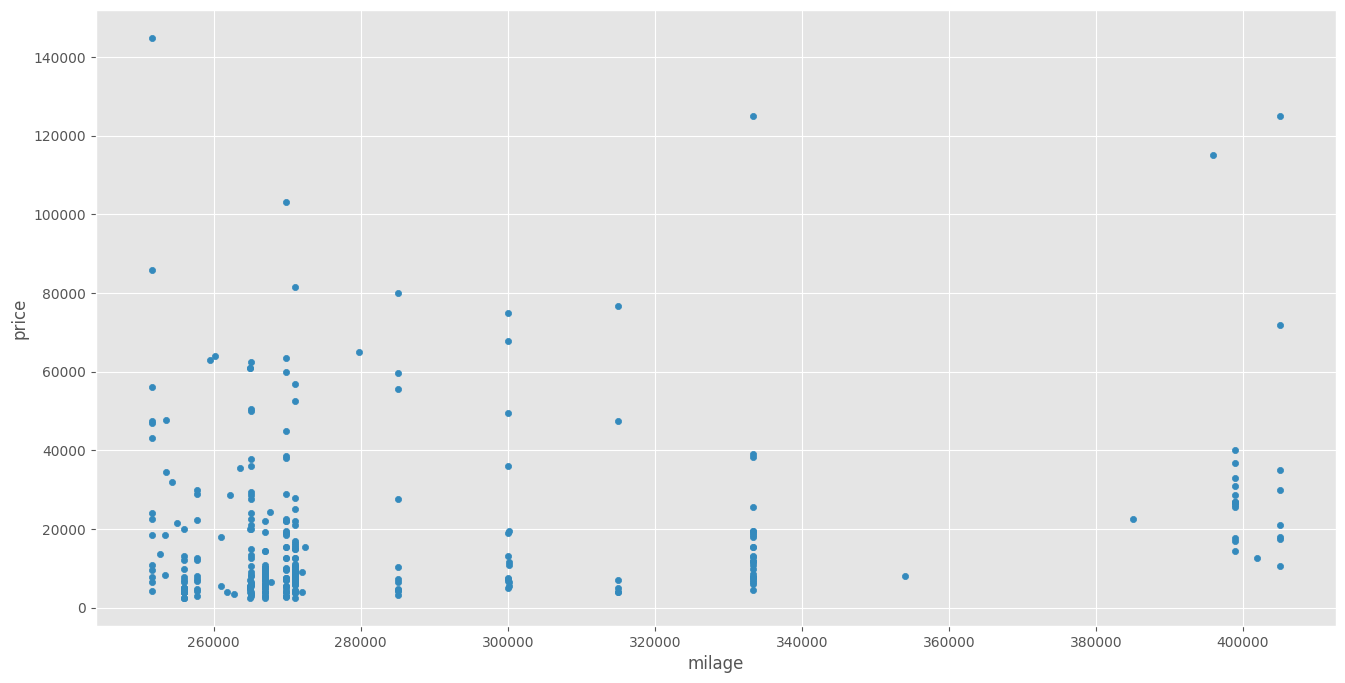

In [ ]:
temp[['price', 'milage']].plot(kind='scatter', x='milage', y='price', figsize=(16, 8))

In [ ]:
num_cols = train_dataset.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
max_threshold = []
min_threshold = []
for i in range(len(num_cols)):
  max_threshold.append(train_dataset[num_cols[i]].quantile(0.95))
  min_threshold.append(train_dataset[num_cols[i]].quantile(0.05))

In [ ]:
for i in range(len(num_cols)):
  print(num_cols[i], ": max_threshold =  " , max_threshold[i], " and min_threshold = ", min_threshold[i])

model_year : max_threshold =   2022.0  and min_threshold =  2004.0
milage : max_threshold =   161800.0  and min_threshold =  4200.0
price : max_threshold =   107900.0  and min_threshold =  6999.0


### Step-4: Data Cleaning


#### Feature Engineering

In [ ]:
train_dataset['fuel_type'].nunique()

7

In [ ]:
train_dataset['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:
train_dataset.loc[train_dataset["fuel_type"] == "–", "fuel_type"] = 'not supported'

In [ ]:
train_dataset['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [ ]:
miss_val_cols = ['fuel_type', 'accident', 'clean_title']

In [ ]:
train_dataset['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported', nan],
      dtype=object)

In [ ]:
train_dataset.loc[train_dataset["accident"] == "None reported", "accident"] = 0
train_dataset.loc[train_dataset["accident"] == "At least 1 accident or damage reported", "accident"] = 1

In [ ]:
train_dataset['accident'].unique()

array([0, 1, nan], dtype=object)

In [ ]:
train_dataset['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [ ]:
train_dataset = train_dataset.fillna(train_dataset.mode().iloc[0])

In [ ]:
train_dataset['clean_title'].unique()


array(['Yes'], dtype=object)

In [ ]:
train_dataset['accident'].unique()


array([0, 1])

In [ ]:
train_dataset['accident'] = train_dataset['accident'].astype(int)

In [ ]:
train_dataset['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', 'Hybrid', 'Diesel', 'Plug-In Hybrid',
       'not supported'], dtype=object)

In [ ]:
test_dataset.loc[test_dataset["fuel_type"] == "–", "fuel_type"] = 'not supported'

In [ ]:
test_dataset.loc[test_dataset["accident"] == "None reported", "accident"] = 0
test_dataset.loc[test_dataset["accident"] == "At least 1 accident or damage reported", "accident"] = 1

In [ ]:
test_dataset['accident'].unique()

array([0, 1, nan], dtype=object)

In [ ]:
test_dataset['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [ ]:
test_dataset = test_dataset.fillna(test_dataset.mode().iloc[0])

In [ ]:
test_dataset['accident'] = test_dataset['accident'].astype(int)

In [ ]:
test_dataset.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0
accident,0


In [ ]:
train_dataset.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,0,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,1,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,0,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,0,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,0,Yes,97500


In [ ]:
train_dataset['engine'].unique()

array(['172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel',
       '252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel',
       '320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capability', ...,
       '78.0HP 1.2L 3 Cylinder Engine Gasoline Fuel',
       '139.0HP 1.6L 4 Cylinder Engine Plug-In Electric/Gas',
       '313.0HP 2.0L 4 Cylinder Engine Plug-In Electric/Gas'],
      dtype=object)

##### Extract No. of cylinders

In [ ]:
import re

In [ ]:
def extract_cylinder(x):
    matches = re.findall("\\b\d+(?= Cylinder\\b)", x)
    if(len(matches) == 0):
        return 0
    else:
        return int(matches[0])

In [ ]:
train_dataset["cylinders"] = train_dataset["engine"].apply(extract_cylinder)
train_dataset["cylinders"].unique()

array([ 4,  8,  0,  6, 10, 12,  5,  3])

In [ ]:
test_dataset["cylinders"] = test_dataset["engine"].apply(extract_cylinder)
test_dataset["cylinders"].unique()

array([ 4,  6,  0,  8, 10, 12,  3,  5])

##### Extract hp from engine column

In [ ]:
def extract_hp(x):
    matches = re.findall("\\b(\d*[.]\d*)(?=HP\\b)", x)
    if(len(matches) == 0):
        return 0
    else:
        return float(matches[0])

In [ ]:
train_dataset["hp"] = train_dataset["engine"].apply(extract_cylinder)
train_dataset["hp"].unique()

array([ 4,  8,  0,  6, 10, 12,  5,  3])

In [ ]:
test_dataset["hp"] = test_dataset["engine"].apply(extract_cylinder)
test_dataset["hp"].unique()

array([ 4,  6,  0,  8, 10, 12,  3,  5])

##### Extract Engine Capacity

In [ ]:
def extract_engine_capacity(x):
    matches = re.findall("\\b(\d*[.]\d*)(?=L\\b)", x)
    if(len(matches) == 0):
        return 0
    else:
        return float(matches[0])

In [ ]:
train_dataset["engine_capacity"] = train_dataset["engine"].apply(extract_engine_capacity)
train_dataset["engine_capacity"].isnull().sum()

0

In [ ]:
test_dataset["engine_capacity"] = test_dataset["engine"].apply(extract_engine_capacity)
test_dataset["engine_capacity"].isnull().sum()

0

In [ ]:
train_dataset.drop('engine', axis=1, inplace=True)
test_dataset.drop('engine', axis=1, inplace=True)

In [ ]:
train_dataset.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,cylinders,hp,engine_capacity
id,,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,A/T,Yellow,Gray,0,Yes,4200,4,4,1.6
1,Lincoln,LS V8,2002,143250,Gasoline,A/T,Silver,Beige,1,Yes,4999,8,8,3.9
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,0,Yes,13900,8,8,5.3
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,0,Yes,45000,8,8,5.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,7-Speed A/T,Black,Beige,0,Yes,97500,4,4,2.0


In [ ]:
train_dataset['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


##### Extract Transmission Type

In [ ]:
def extract_transmission_type(x):
    data = None
    if(re.search("(Automatic|A\/T|AT|At)", x) != None):
        data = "Automatic"
    if(re.search("(Manual|M\/T|MT|Mt)", x) != None):
        data = "Manual"
    if(re.search("(CVT|Variable)", x) != None ):
        data = "CVT"
    if("DCT" in x):
        data = "DCT"
    if(data == None):
        data = "Other"

    return data

In [ ]:
train_dataset["transmission"] = train_dataset["transmission"].apply(extract_transmission_type)
train_dataset["transmission"].unique()

array(['Automatic', 'Other', 'CVT', 'Manual', 'DCT'], dtype=object)

In [ ]:
test_dataset["transmission"] = test_dataset["transmission"].apply(extract_transmission_type)
test_dataset["transmission"].unique()

array(['Automatic', 'Other', 'Manual', 'CVT', 'DCT'], dtype=object)

##### Extract Exterir Color

In [ ]:
def get_matplot_color(colors):
    for color in colors.split():
        if(color.lower() in plt.matplotlib.colors.cnames.keys()):
            return color.lower()
    return color.lower()

In [ ]:
train_dataset["ext_col"] = train_dataset["ext_col"].apply(get_matplot_color)
train_dataset["ext_col"].unique()

array(['yellow', 'silver', 'blue', 'black', 'white', 'gray', 'green',
       'purple', 'metallic', 'red', 'beige', 'gold', 'blu', 'orange',
       'brown', 'plum', 'grey', 'caviar', '–', 'snow', 'obsidian', 'sea',
       'blueprint', 'borealis', 'noctis', 'tricoat', 'matte', 'pearl',
       'sapphire', 'onyx', 'chalk', 'tintcoat', 'corsa', 'color',
       'tempest', 'rock', 'pearlcoat', 'eleos', 'clearcoat', 'cloud',
       'monocerus', 'moss', 'mica', 'platinum', 'isis', 'granite',
       'chromaflair', 'pink', 'ice', 'verde', 'daytona', 'c', 'yulong',
       'rosso', 'mango!', 'ember', 'crimson', 'tan', 'glacier', 'maroon',
       'nimbus'], dtype=object)

In [ ]:
test_dataset["ext_col"] = test_dataset["ext_col"].apply(get_matplot_color)
test_dataset["ext_col"].unique()

array(['white', 'silver', 'yellow', 'gray', 'black', 'blue', 'red',
       'gold', 'green', 'blu', 'beige', 'orange', 'brown', 'metallic',
       'mica', 'grey', 'blueprint', 'color', 'purple', 'pearl', '–',
       'sea', 'glacier', 'tan', 'verde', 'noctis', 'c', 'tintcoat',
       'matte', 'sapphire', 'corsa', 'tricoat', 'moss', 'mango!',
       'caviar', 'snow', 'ice', 'plum', 'maroon', 'rock', 'rosso',
       'eleos', 'daytona', 'cloud', 'chalk', 'chromaflair', 'obsidian',
       'isis', 'crimson', 'onyx', 'tempest', 'nimbus', 'borealis',
       'pearlcoat', 'ember', 'pink', 'yulong', 'clearcoat', 'granite',
       'platinum', 'monocerus'], dtype=object)

In [ ]:
train_dataset.shape

(188533, 14)

In [ ]:
test_dataset.shape

(125690, 13)

In [ ]:
def top_10_cols(x, cols):
    if x in cols:
        return x
    else:
        return "other"

In [ ]:
top_10_ext_cols = train_dataset["ext_col"].value_counts(ascending=False).index[:10]
top_10_ext_cols

Index(['black', 'white', 'gray', 'silver', 'blue', 'red', 'green', 'metallic',
       'gold', 'brown'],
      dtype='object', name='ext_col')

In [ ]:
train_dataset["ext_col"] = train_dataset["ext_col"].apply(lambda x: top_10_cols(x, top_10_ext_cols))
train_dataset["ext_col"].unique()

array(['other', 'silver', 'blue', 'black', 'white', 'gray', 'green',
       'metallic', 'red', 'gold', 'brown'], dtype=object)

In [ ]:
test_dataset["ext_col"] = test_dataset["ext_col"].apply(lambda x: top_10_cols(x, top_10_ext_cols))
test_dataset["ext_col"].unique()

array(['white', 'silver', 'other', 'gray', 'black', 'blue', 'red', 'gold',
       'green', 'brown', 'metallic'], dtype=object)

In [ ]:
train_dataset["int_col"] = train_dataset["int_col"].apply(get_matplot_color)
train_dataset["int_col"].unique()

array(['gray', 'beige', 'black', '–', 'blue', 'white', 'red', 'brown',
       'galvanized', 'parchment.', 'boulder', 'orange', 'ebony', 'silver',
       'macchiato/magmagrey', 'gold', 'cloud', 'green', 'stone', 'navy',
       'ash', 'portland', 'sandstone', 'beige/black', 'metal', 'slate',
       'charcoal', 'cappuccino', 'parchment', 'w/contrast', 'ebony.',
       'graystone', 'ade', 'graphite', 'tan/ebony/ebony', 'titanium',
       'tan', 'brandy', 'amber', 'hotspur', 'chateau', 'ice', 'garnet',
       'blk', 'oyster/black', 'mesa', 'espresso', 'black/graphite',
       'accents', 'tan/ebony', 'ceramic', 'dune', 'roast', 'yellow',
       'hide', 'chestnut', 'walnut', 'ivory', 'caramel', 'stitch',
       'pimento', 'tension', 'pewter', 'leather', 'macchiato',
       'anthracite', 'mocha', 'porpoise', 'black/red', 'cypress',
       'tupelo', 'gideon', 'camel', 'nero', 'auburn', 'shale', 'linen',
       'red/black', 'polar', 'platinum', 'sport', 'orange/black',
       'cashmere', 'orchid

In [ ]:
test_dataset["int_col"] = test_dataset["int_col"].apply(get_matplot_color)
test_dataset["int_col"].unique()

array(['beige', 'black', 'ebony', 'gray', '–', 'red', 'orange/black',
       'white', 'brown', 'tan', 'silver', 'graphite', 'orange', 'hide',
       'titanium', 'stone', 'blue', 'green', 'linen', 'cappuccino',
       'black/graphite', 'sandstone', 'blk', 'ade', 'mocha', 'cashmere',
       'gold', 'metal', 'nero', 'chestnut', 'gideon', 'shale', 'hotspur',
       'mesa', 'beige/black', 'platinum', 'parchment', 'walnut', 'brandy',
       'macchiato/magmagrey', 'sport', 'chateau', 'camel', 'garnet',
       'parchment.', 'ceramic', 'espresso', 'slate', 'accents', 'cloud',
       'navy', 'ebony.', 'charcoal', 'yellow', 'tan/ebony/ebony',
       'auburn', 'stitch', 'dune', 'w/contrast', 'ash', 'ice', 'pimento',
       'orchid', 'portland', 'amber', 'galvanized', 'tension',
       'red/black', 'tan/ebony', 'anthracite', 'cypress', 'macchiato',
       'leather', 'roast', 'ivory', 'boulder', 'pewter', 'polar',
       'beluga', 'black/red', 'porpoise', 'oyster/black', 'graystone',
       'tupelo'

In [ ]:
top_10_int_cols = train_dataset["int_col"].value_counts(ascending=False).index[:10]
top_10_int_cols

Index(['black', 'beige', 'gray', 'brown', 'red', 'white', '–', 'ebony',
       'orange', 'blue'],
      dtype='object', name='int_col')

In [ ]:
train_dataset["int_col"] = train_dataset["int_col"].apply(lambda x: top_10_cols(x, top_10_int_cols))
train_dataset["int_col"].unique()

array(['gray', 'beige', 'black', '–', 'blue', 'white', 'red', 'brown',
       'other', 'orange', 'ebony'], dtype=object)

In [ ]:
test_dataset["int_col"] = test_dataset["int_col"].apply(lambda x: top_10_cols(x, top_10_int_cols))
test_dataset["int_col"].unique()

array(['beige', 'black', 'ebony', 'gray', '–', 'red', 'other', 'white',
       'brown', 'orange', 'blue'], dtype=object)

In [ ]:
train_dataset.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,cylinders,hp,engine_capacity
id,,,,,,,,,,,,,,
0,MINI,Cooper S Base,2007,213000,Gasoline,Automatic,other,gray,0,Yes,4200,4,4,1.6
1,Lincoln,LS V8,2002,143250,Gasoline,Automatic,silver,beige,1,Yes,4999,8,8,3.9
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,Automatic,blue,gray,0,Yes,13900,8,8,5.3
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,Other,black,black,0,Yes,45000,8,8,5.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,Automatic,black,beige,0,Yes,97500,4,4,2.0


In [ ]:
train_dataset['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [ ]:
top_10_pricing_cars = train_dataset[["brand","price"]].groupby("brand").mean().sort_values("price",ascending = True).tail(10).index
top_10_listing_cars = train_dataset["brand"].value_counts(ascending=True).tail(10).index

In [ ]:
def prepare_brand_value(x):
    if(x in top_10_pricing_cars or x in top_10_listing_cars):
        return x
    else:
        return "Other"

In [ ]:
train_dataset["brand"] = train_dataset["brand"].apply(prepare_brand_value)
train_dataset["brand"].value_counts()

,count
brand,
Other,53888
Ford,23088
Mercedes-Benz,19172
BMW,17028
Chevrolet,16335
Audi,10887
Porsche,10612
Land,9525
Toyota,8850


In [ ]:
test_dataset["brand"] = test_dataset["brand"].apply(prepare_brand_value)

In [ ]:
train_dataset.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,cylinders,hp,engine_capacity
id,,,,,,,,,,,,,,
0,Other,Cooper S Base,2007,213000,Gasoline,Automatic,other,gray,0,Yes,4200,4,4,1.6
1,Other,LS V8,2002,143250,Gasoline,Automatic,silver,beige,1,Yes,4999,8,8,3.9
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,Automatic,blue,gray,0,Yes,13900,8,8,5.3
3,Other,G90 5.0 Ultimate,2017,19500,Gasoline,Other,black,black,0,Yes,45000,8,8,5.0
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,Automatic,black,beige,0,Yes,97500,4,4,2.0


In [ ]:
train_dataset['model'].nunique()

1897

In [ ]:
top_10_model_pricing = train_dataset[["model","price"]].groupby("model").mean().sort_values("price",ascending = True).tail(10).index


In [ ]:
top_10_model_pricing

Index(['911 R', 'Flying Spur V8', 'Huracan EVO Coupe', 'Rover LR4 Lux',
       'Bentayga Speed', 'Martin DB7 Vantage Volante',
       'Continental GT GT Speed', 'Phantom Drophead Coupe Drophead',
       'Gallardo SE', 'Carrera GT Base'],
      dtype='object', name='model')

In [ ]:
top_10_model = train_dataset["model"].value_counts(ascending=True).tail(10).index

In [ ]:
top_10_model

Index(['Corvette Base', '911 Carrera S', '1500 Laramie',
       'E-Class E 350 4MATIC', 'F-150 Lariat', 'Mustang GT Premium', 'M4 Base',
       'Camaro 2SS', 'M3 Base', 'F-150 XLT'],
      dtype='object', name='model')

In [ ]:
def prepare_model_value(x):
    if(x in top_10_model_pricing or x in top_10_model):
        return x
    else:
        return "Other"

In [ ]:
train_dataset["model_category"] = train_dataset["model"].apply(prepare_model_value)
train_dataset["model_category"].head()

,model_category
id,
0,Other
1,Other
2,Other
3,Other
4,Other


In [ ]:
test_dataset["model_category"] = test_dataset["model"].apply(prepare_model_value)

In [ ]:
train_dataset.drop('model', axis=1, inplace=True)
test_dataset.drop('model', axis=1, inplace=True)

In [ ]:
train_dataset.shape

(188533, 14)

In [ ]:
test_dataset.shape

(125690, 13)

#### Handle Categorical Features

In [ ]:
categorical_columns = train_dataset.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns_encoded = [value+"_encoded" for value in categorical_columns]

In [ ]:
label_encoder = LabelEncoder()

# Process each categorical column
for column in categorical_columns:
    # Convert the column to string to handle mixed types
    train_dataset[column] = train_dataset[column].astype(str)

    # Apply Label Encoding
    train_dataset[column + '_encoded'] = label_encoder.fit_transform(train_dataset[column])

    # Convert the column to string to handle mixed types
    test_dataset[column] = test_dataset[column].astype(str)

    # Apply Label Encoding
    test_dataset[column + '_encoded'] = label_encoder.fit_transform(test_dataset[column])

In [ ]:
train_dataset.columns

Index(['brand', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title', 'price', 'cylinders', 'hp',
       'engine_capacity', 'model_category', 'brand_encoded',
       'fuel_type_encoded', 'transmission_encoded', 'ext_col_encoded',
       'int_col_encoded', 'clean_title_encoded', 'model_category_encoded'],
      dtype='object')

In [ ]:
for column in categorical_columns:
  train_dataset.drop(column, axis=1, inplace=True)
  test_dataset.drop(column, axis=1, inplace=True)

In [ ]:
train_dataset.shape

(188533, 14)

In [ ]:
test_dataset.shape

(125690, 13)

## Step-5: Modeling

In [ ]:
train_dataset.head()

,model_year,milage,accident,price,cylinders,hp,engine_capacity,brand_encoded,fuel_type_encoded,transmission_encoded,ext_col_encoded,int_col_encoded,clean_title_encoded,model_category_encoded
id,,,,,,,,,,,,,,
0,2007,213000,0,4200,4,4,1.6,15,2,0,7,5,0,18
1,2002,143250,1,4999,8,8,3.9,15,2,0,9,0,0,18
2,2002,136731,0,13900,8,8,5.3,5,1,0,1,5,0,18
3,2017,19500,0,45000,8,8,5.0,15,2,4,0,1,0,18
4,2021,7388,0,97500,4,4,2.0,14,2,0,0,0,0,18


In [ ]:
y = train_dataset['price']
X = train_dataset.drop('price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(150826, 13)

In [ ]:
y_train.shape

(150826,)

In [ ]:
X_test.shape

(37707, 13)

In [ ]:
y_test.shape

(37707,)

In [ ]:
X_train = np.array(X_train)

In [ ]:
y_train = np.array(y_train)

In [ ]:
X_test = np.array(X_test)

In [ ]:
y_test = np.array(y_test)

In [ ]:
X_train = np.c_[X_train, X_train**2, X_train**3, X_train**4, X_train**5]

In [ ]:
X_test = np.c_[X_test, X_test**2, X_test**3, X_test**4, X_test**5]

##### Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
# Fit and transform the data
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
import math, copy

In [ ]:
class LinearRegression:

  def __init__(self, alpha = 1e-5, iterations = 10000):
      self.alpha = alpha
      self.iterations = iterations
      self.theta = None
      self.b = None

  def predict(self, data):

    """
    data: the given dataset shape = (m , n)
    theta: weights shape = (n, 1)
    b: bias shape = (1, )

    return: yhat with shape = (m, 1)
    """

    return np.dot(data, self.theta) + self.b


  def compute_cost(self, data, label):
    """
      self.theta: (n, 1)
      self.b: (1)
      data: (m, n) -> n is the number of features
      label: (m,1)

      output = cost function = J(theta, b) = (1/2m) sum(power(yhat - y, 2))
    """
    m = data.shape[0]
    total_cost = 0.0
    for i in range(m):
      yhat_i = np.dot(data[i], self.theta) + self.b
      total_cost += (yhat_i - label[i])**2

    total_cost = total_cost/(2*m)
    return total_cost

  def compute_gradient(self, data, label):
    """
    data: the given dataset
    label: the label
    self.theta: weights
    self.b: bias

    """
    m,n = data.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(data[i], self.theta) + self.b) - label[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * data[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

  def gradient_descent(self, X, y):

    """
    Performs batch gradient descent to learn theta. Updates theta by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    n_samples, n_features = X.shape
    self.theta = np.zeros(n_features)  #avoid modifying global w within function
    self.b = 0.

    for i in range(self.iterations):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = self.compute_gradient(X, y)   ##None

        # Update Parameters using w, b, alpha and gradient
        self.theta = self.theta - self.alpha * dj_dw               ##None
        self.b = self.b - self.alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( self.compute_cost(X, y))
        #print(self.compute_cost(X, y))
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(self.iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return J_history #return final w,b and J history for graphing




In [ ]:
#reg = LinearRegression()

In [ ]:
#J_history = reg.gradient_descent(X_train_scaled, y_train)

In [ ]:
import xgboost as xg

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [ ]:
xgb_r.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:
pred = xgb_r.predict(X_test_scaled)

In [ ]:
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  69271.430272


In [ ]:
test_set = np.array(test_dataset)

In [ ]:
test_set = np.c_[test_set, test_set**2, test_set**3, test_set**4, test_set**5]

In [ ]:
test_set_scaled = scaler.fit_transform(test_set)

In [ ]:
prediction = xgb_r.predict(test_set_scaled)

In [ ]:
prediction

array([18033.645, 71395.28 , 52295.094, ..., 24196.818, 41669.52 ,
       46798.383], dtype=float32)

In [ ]:
submit = pd.read_csv('/content/drive/MyDrive/Used Car Prices Dataset/sample_submission.csv')
submit.price = prediction[::]
submit[['id', 'price']].to_csv('/content/drive/MyDrive/Used Car Prices Dataset/submit.csv', index=False)